In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import and Encode Data

In [2]:
df = pd.read_csv("bank_data.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
1,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
2,32,management,single,tertiary,no,2536,yes,no,cellular,26,aug,958,6,-1,0,unknown,yes
3,49,technician,married,tertiary,no,1235,no,no,cellular,13,aug,354,3,-1,0,unknown,yes
4,78,retired,divorced,primary,no,229,no,no,telephone,22,oct,97,1,-1,0,unknown,yes


In [3]:
X = df.iloc[:,:16]
y = df.iloc[:,16:]

In [4]:
X = pd.get_dummies(X)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
y = LabelEncoder().fit_transform(np.ravel(y))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

# Logistic Regression (Part A)

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Full Model

In [11]:
full_mod = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()

In [12]:
full_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      790
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -331.47
Date:                Wed, 07 Dec 2022   Deviance:                       662.94
Time:                        20:18:20   Pearson chi2:                 7.26e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4459
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1655      0.244      0.677      0.498      -0.313       0.644
age                    -0.0103      0.013     -0.783      0.433      -0.036       0.015
balance             -2.084e-05   3.45e-05     -0.604      0.546   -8.84e-05    4.68e-05
day                     0.0152      0.014      1.113      0.266      -0.012       0.042
duration                0.0052      0.000     11.794      0.000       0.004       0.006
campaign               -0.1316      0.057     -2.308      0.021      -0.243      -0.020
pdays                  -0.0022      0.002     -1.102      0.270      -0.006       0.002
previous               -0.1213      0.098     -1.234      0.217      -0.314       0.071
job_admin.              0.4162      0.339      1.229      0.219      -0.247       1.080
job_blue-collar        -0.6601      0.292     -2.260      0.024      -1.233      -0.088
job_entrepreneur        0.6350      0.551      1.153      0.249      -0.444       1.714
job_housemaid          -0.1666      0.524     -0.318      0.751      -1.194       0.861
job_management          0.0982      0.290      0.338      0.735      -0.471       0.667
job_retired             0.7708      0.428      1.800      0.072      -0.068       1.610
job_self-employed      -0.2479      0.472     -0.525      0.600      -1.173       0.678
job_services           -0.5307      0.382     -1.390      0.165      -1.279       0.218
job_student             0.3052      0.575      0.531      0.595      -0.821       1.432
job_technician         -0.1292      0.271     -0.476      0.634      -0.661       0.403
job_unemployed         -1.9232      0.721     -2.668      0.008      -3.336      -0.510
job_unknown             1.5979      0.931      1.716      0.086      -0.227       3.423
marital_divorced        0.3131      0.245      1.277      0.201      -0.167       0.794
marital_married        -0.0683      0.168     -0.406      0.684      -0.398       0.261
marital_single         -0.0794      0.189     -0.420      0.675      -0.450       0.291
education_primary       0.1468      0.291      0.505      0.614      -0.423       0.717
education_secondary     0.0224      0.215      0.104      0.917      -0.400       0.445
education_tertiary      0.2311      0.254      0.910      0.363      -0.266       0.729
education_unknown      -0.2349      0.481     -0.488      0.625      -1.178       0.708
default_no             -0.3974      0.424     -0.938      0.348      -1.228       0.433
default_yes             0.5629      0.526      1.071      0.284      -0.467       1.593
housing_no              0.2367      0.166      1.428      0.153      -0.088       0.562
housing_yes            -0.0712      0.169     -0.420      0.674      -0.403       0.261
loan_no                 0.5321      0.209      2.546      0.011       0.123       0.942
loa

## Intermediate Models

### 1

In [13]:
X_train_i = X_train.copy()
X_test_i = X_test.copy()
for column in X_train_i.columns:
    if full_mod.pvalues.loc[column] > 0.38:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [14]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [15]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      800
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -332.92
Date:                Wed, 07 Dec 2022   Deviance:                       665.83
Time:                        20:18:20   Pearson chi2:                 7.54e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4440
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3170      0.487     -0.651      0.515      -1.272       0.638
day                    0.0151      0.013      1.157      0.247      -0.010       0.041
duration               0.0052      0.000     11.869      0.000       0.004       0.006
campaign              -0.1327      0.056     -2.354      0.019      -0.243      -0.022
pdays                 -0.0021      0.002     -1.093      0.274      -0.006       0.002
previous              -0.1214      0.099     -1.229      0.219      -0.315       0.072
job_admin.             0.4899      0.356      1.374      0.169      -0.209       1.188
job_blue-collar       -0.5739      0.322     -1.784      0.074      -1.204       0.056
job_entrepreneur       0.7023      0.593      1.185      0.236      -0.460       1.864
job_retired            0.6140      0.388      1.581      0.114      -0.147       1.375
job_services          -0.4580      0.411     -1.114      0.265      -1.264       0.348
job_unemployed        -1.8594      0.776     -2.395      0.017      -3.381      -0.338
job_unknown            1.3621      0.963      1.415      0.157      -0.525       3.249
marital_divorced       0.2842      0.304      0.934      0.351      -0.312       0.881
education_tertiary     0.2861      0.240      1.190      0.234      -0.185       0.757
default_no            -0.6617      0.419     -1.580      0.114      -1.483       0.159
default_yes            0.3447      0.617      0.559      0.576      -0.864       1.553
housing_no             0.3036      0.222      1.368      0.171      -0.131       0.739
loan_no                0.2807      0.291      0.965      0.334      -0.289       0.851
loan_yes              -0.5978      0.308     -1.942      0.052      -1.201       0.006
contact_cellular       0.7217      0.442      1.631      0.103      -0.146       1.589
contact_unknown       -0.5451      0.513     -1.064      0.288      -1.550       0.459
month_aug             -0.6501      0.345     -1.885      0.059      -1.326       0.026
month_dec              1.4502      1.407      1.031      0.303      -1.308       4.208
month_feb             -0.5302      0.428     -1.238      0.216      -1.370       0.309
month_jan             -1.7319      0.629     -2.752      0.006      -2.965      -0.498
month_jul             -1.1672      0.369     -3.160      0.002      -1.891      -0.443
month_mar              2.8859      1.092      2.643      0.008       0.746       5.026
month_may             -0.7229      0.316     -2.287      0.022      -1.343      -0.103
month_nov             -1.2980      0.394     -3.298      0.001      -2.069      -0.527
month_oct              2.3554      0.825      2.855      0.004       0.739       3.972
month_sep              0.9073      0.722      1.257      0.209      -0.507       2.322
poutcome_failure      -0.6163      0.4

### 2

In [16]:
X_train_i = X_train_i.copy()
X_test_i = X_test_i.copy()
for column in X_train_i.columns:
    if full_mod.pvalues.loc[column] > 0.2:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [17]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [18]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      810
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -339.30
Date:                Wed, 07 Dec 2022   Deviance:                       678.60
Time:                        20:18:20   Pearson chi2:                 7.21e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4354
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7829      0.428     -1.831      0.067      -1.621       0.055
duration             0.0051      0.000     11.932      0.000       0.004       0.006
campaign            -0.1248      0.054     -2.298      0.022      -0.231      -0.018
job_blue-collar     -0.8813      0.278     -3.175      0.001      -1.425      -0.337
job_retired          0.5053      0.364      1.387      0.165      -0.209       1.219
job_services        -0.7556      0.382     -1.976      0.048      -1.505      -0.006
job_unemployed      -1.9651      0.770     -2.552      0.011      -3.474      -0.456
job_unknown          0.9767      0.966      1.011      0.312      -0.916       2.869
housing_no           0.2981      0.217      1.372      0.170      -0.128       0.724
loan_no              0.0069      0.236      0.029      0.977      -0.455       0.469
loan_yes            -0.7898      0.302     -2.614      0.009      -1.382      -0.198
contact_cellular     0.6836      0.429      1.594      0.111      -0.157       1.524
contact_unknown     -0.6256      0.498     -1.256      0.209      -1.602       0.351
month_aug           -0.7974      0.333     -2.393      0.017      -1.450      -0.144
month_feb           -0.7335      0.410     -1.789      0.074      -1.537       0.070
month_jan           -1.6224      0.610     -2.658      0.008      -2.819      -0.426
month_jul           -1.2735      0.350     -3.638      0.000      -1.960      -0.587
month_mar            2.7703      1.080      2.565      0.010       0.654       4.887
month_may           -0.8171      0.298     -2.746      0.006      -1.400      -0.234
month_nov           -1.2604      0.373     -3.380      0.001      -1.991      -0.530
month_oct            2.3099      0.817      2.828      0.005       0.709       3.911
poutcome_failure    -0.6306      0.478     -1.318      0.187      -1.568       0.307
poutcome_success     2.8836      0.830      3.474      0.001       1.257       4.510
poutcome_unknown    -0.6396      0.407     -1.571      0.116      -1.438       0.158
====================================================================================
"""

### 3

In [19]:
X_train_i = X_train_i.copy()
X_test_i = X_test_i.copy()
for column in X_train_i.columns:
    if full_mod.pvalues.loc[column] > 0.15:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [20]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [21]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      812
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -342.34
Date:                Wed, 07 Dec 2022   Deviance:                       684.68
Time:                        20:18:20   Pearson chi2:                 6.15e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4312
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6506      0.412     -1.579      0.114      -1.458       0.157
duration             0.0050      0.000     11.874      0.000       0.004       0.006
campaign            -0.1328      0.053     -2.502      0.012      -0.237      -0.029
job_blue-collar     -0.8141      0.272     -2.993      0.003      -1.347      -0.281
job_retired          0.6405      0.358      1.789      0.074      -0.061       1.342
job_unemployed      -1.8811      0.767     -2.452      0.014      -3.385      -0.378
job_unknown          1.1424      0.957      1.194      0.233      -0.733       3.018
loan_no              0.0674      0.230      0.293      0.770      -0.384       0.519
loan_yes            -0.7180      0.295     -2.438      0.015      -1.295      -0.141
contact_cellular     0.5807      0.425      1.365      0.172      -0.253       1.414
contact_unknown     -0.7609      0.492     -1.548      0.122      -1.725       0.203
month_aug           -0.7224      0.330     -2.190      0.029      -1.369      -0.076
month_feb           -0.6279      0.403     -1.557      0.119      -1.418       0.162
month_jan           -1.5208      0.608     -2.501      0.012      -2.713      -0.329
month_jul           -1.3375      0.346     -3.863      0.000      -2.016      -0.659
month_mar            2.7245      1.071      2.543      0.011       0.625       4.824
month_may           -0.9128      0.290     -3.147      0.002      -1.481      -0.344
month_nov           -1.2951      0.369     -3.511      0.000      -2.018      -0.572
month_oct            2.2976      0.810      2.835      0.005       0.709       3.886
poutcome_failure    -0.6619      0.473     -1.398      0.162      -1.590       0.266
poutcome_success     2.9778      0.828      3.596      0.000       1.355       4.601
poutcome_unknown    -0.6047      0.404     -1.496      0.135      -1.397       0.187
====================================================================================
"""

### 4

In [22]:
X_train_i = X_train_i.copy()
X_test_i = X_test_i.copy()
for column in X_train_i.columns:
    if full_mod.pvalues.loc[column] > 0.1:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [23]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [24]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      813
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -343.56
Date:                Wed, 07 Dec 2022   Deviance:                       687.13
Time:                        20:18:20   Pearson chi2:                 5.94e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4296
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7374      0.406     -1.816      0.069      -1.533       0.058
duration             0.0050      0.000     11.858      0.000       0.004       0.006
campaign            -0.1304      0.053     -2.462      0.014      -0.234      -0.027
job_blue-collar     -0.7969      0.271     -2.936      0.003      -1.329      -0.265
job_retired          0.6451      0.357      1.809      0.070      -0.054       1.344
job_unemployed      -1.8819      0.766     -2.457      0.014      -3.383      -0.380
job_unknown          1.1437      0.956      1.196      0.232      -0.730       3.017
loan_no              0.0196      0.227      0.086      0.931      -0.425       0.464
loan_yes            -0.7570      0.293     -2.587      0.010      -1.331      -0.183
contact_cellular     0.5577      0.424      1.314      0.189      -0.274       1.389
contact_unknown     -0.6886      0.489     -1.408      0.159      -1.647       0.270
month_aug           -0.5497      0.310     -1.775      0.076      -1.157       0.057
month_jan           -1.3528      0.597     -2.267      0.023      -2.522      -0.183
month_jul           -1.1701      0.328     -3.565      0.000      -1.813      -0.527
month_mar            2.8977      1.065      2.720      0.007       0.810       4.986
month_may           -0.7803      0.277     -2.819      0.005      -1.323      -0.238
month_nov           -1.1225      0.351     -3.199      0.001      -1.810      -0.435
month_oct            2.4570      0.801      3.068      0.002       0.887       4.026
poutcome_failure    -0.6838      0.470     -1.456      0.145      -1.604       0.237
poutcome_success     2.9714      0.826      3.597      0.000       1.353       4.590
poutcome_unknown    -0.6309      0.400     -1.577      0.115      -1.415       0.153
====================================================================================
"""

### 5

In [25]:
X_train_i = X_train_i.copy()
X_test_i = X_test_i.copy()
for column in X_train_i.columns:
    if full_mod.pvalues.loc[column] > 0.05:
        X_train_i.drop(column,axis=1, inplace=True)
        X_test_i.drop(column,axis=1, inplace=True)

In [26]:
int_mod = sm.GLM(y_train, sm.add_constant(X_train_i), family=sm.families.Binomial()).fit()

In [27]:
int_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      815
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -345.84
Date:                Wed, 07 Dec 2022   Deviance:                       691.68
Time:                        20:18:20   Pearson chi2:                 7.21e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4265
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2533      0.656     -1.910      0.056      -2.540       0.033
duration             0.0051      0.000     11.895      0.000       0.004       0.006
campaign            -0.1379      0.053     -2.607      0.009      -0.242      -0.034
job_blue-collar     -0.8643      0.269     -3.213      0.001      -1.392      -0.337
job_unemployed      -1.9571      0.769     -2.544      0.011      -3.465      -0.449
loan_no              0.7767      0.330      2.352      0.019       0.130       1.424
contact_cellular     0.3828      0.407      0.940      0.347      -0.416       1.181
contact_unknown     -0.8409      0.476     -1.768      0.077      -1.773       0.091
month_aug           -0.5055      0.306     -1.651      0.099      -1.106       0.095
month_jan           -1.1746      0.577     -2.035      0.042      -2.306      -0.043
month_jul           -1.1635      0.326     -3.574      0.000      -1.802      -0.525
month_mar            2.9112      1.065      2.733      0.006       0.823       4.999
month_may           -0.8073      0.275     -2.932      0.003      -1.347      -0.268
month_nov           -1.1154      0.349     -3.197      0.001      -1.799      -0.432
month_oct            2.4660      0.795      3.102      0.002       0.908       4.024
poutcome_failure    -0.6378      0.470     -1.357      0.175      -1.559       0.283
poutcome_success     2.9543      0.825      3.581      0.000       1.337       4.571
poutcome_unknown    -0.6336      0.401     -1.582      0.114      -1.419       0.152
====================================================================================
"""

## Reduced Model

In [28]:
X_train_r = X_train_i.copy()
X_test_r = X_test_i.copy()
for column in X_train_i.columns:
    if int_mod.pvalues.loc[column] > 0.05:
        X_train_r.drop(column,axis=1, inplace=True)
        X_test_r.drop(column,axis=1, inplace=True)

In [29]:
red_mod = sm.GLM(y_train, sm.add_constant(X_train_r), family=sm.families.Binomial()).fit()

In [30]:
red_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  833
Model:                            GLM   Df Residuals:                      820
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -358.92
Date:                Wed, 07 Dec 2022   Deviance:                       717.83
Time:                        20:18:20   Pearson chi2:                 6.16e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4082
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8242      0.377     -4.838      0.000      -2.563      -1.085
duration             0.0049      0.000     11.894      0.000       0.004       0.006
campaign            -0.1605      0.051     -3.156      0.002      -0.260      -0.061
job_blue-collar     -0.9104      0.260     -3.496      0.000      -1.421      -0.400
job_unemployed      -1.7244      0.749     -2.303      0.021      -3.192      -0.257
loan_no              0.8350      0.323      2.585      0.010       0.202       1.468
month_jan           -0.9107      0.559     -1.631      0.103      -2.005       0.184
month_jul           -0.8384      0.293     -2.864      0.004      -1.412      -0.265
month_mar            3.1963      1.060      3.016      0.003       1.119       5.274
month_may           -0.9612      0.245     -3.919      0.000      -1.442      -0.481
month_nov           -0.7662      0.328     -2.339      0.019      -1.408      -0.124
month_oct            2.6268      0.769      3.417      0.001       1.120       4.134
poutcome_success     3.6881      0.735      5.018      0.000       2.248       5.129
====================================================================================
"""

## AUC ROC

In [31]:
y1 = full_mod.predict(sm.add_constant(X_train))
y2 = full_mod.predict(sm.add_constant(X_test))
y3 = red_mod.predict(sm.add_constant(X_train_r))
y4 = red_mod.predict(sm.add_constant(X_test_r))

In [32]:
from sklearn import metrics

In [33]:
fpr1, tpr1, _ = metrics.roc_curve(y_train,  y1)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y2)
fpr3, tpr3, _ = metrics.roc_curve(y_train,  y3)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y4)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
auc3 = metrics.auc(fpr3, tpr3)
auc4 = metrics.auc(fpr4, tpr4)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for t in np.linspace(0,1,101):
    y_pred1 = np.where(y1>t, 1, 0)
    if accuracy_score(y_train, y_pred1) > a1:
        a1 = accuracy_score(y_train, y_pred1)
for t in np.linspace(0,1,101):
    y_pred2 = np.where(y2>t, 1, 0)
    if accuracy_score(y_test, y_pred2) > a2:
        a2 = accuracy_score(y_test, y_pred2)
for t in np.linspace(0,1,101):
    y_pred3 = np.where(y3>t, 1, 0)
    if accuracy_score(y_train, y_pred3) > a3:
        a3 = accuracy_score(y_train, y_pred3)
for t in np.linspace(0,1,101):
    y_pred4 = np.where(y4>t, 1, 0)
    if accuracy_score(y_test, y_pred4) > a4:
        a4 = accuracy_score(y_test, y_pred4) 

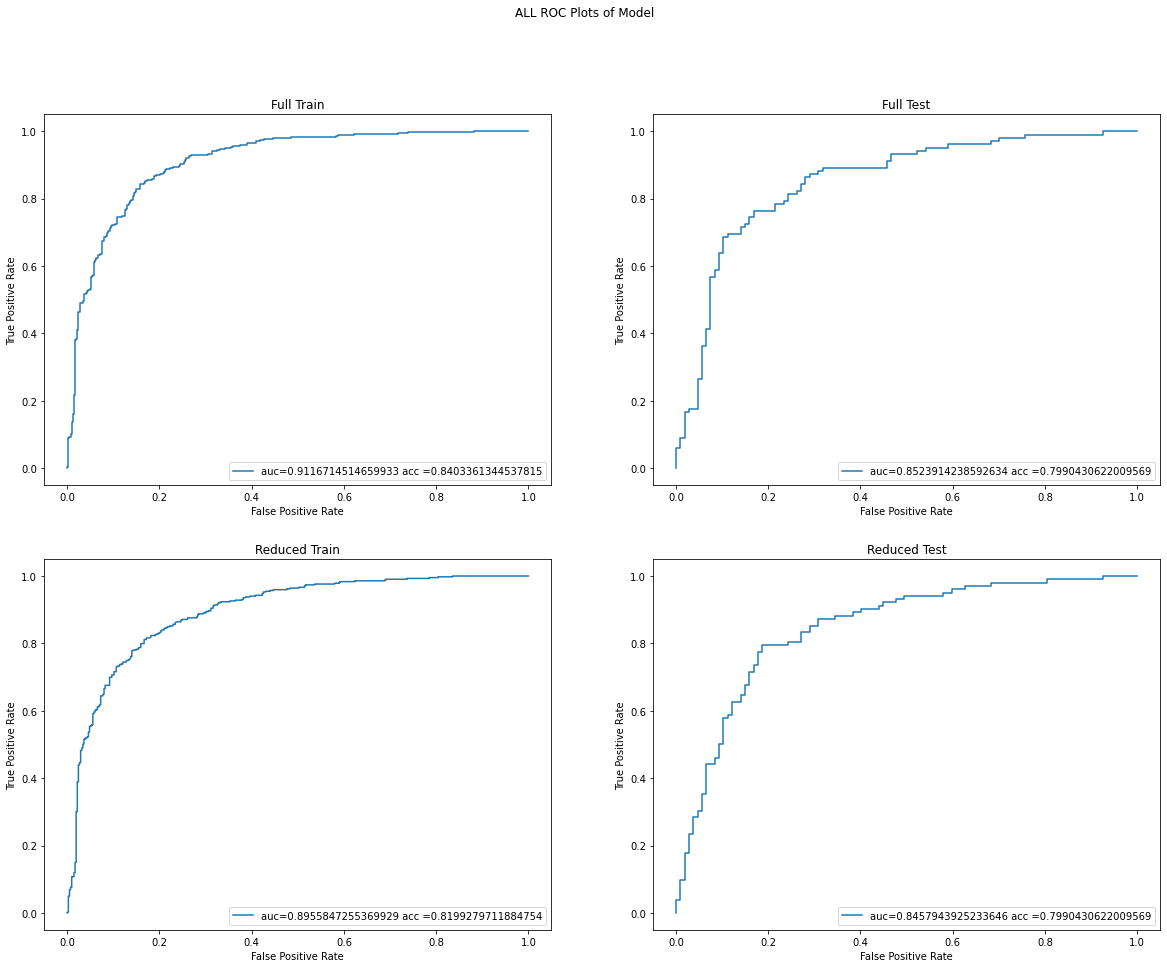

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('ALL ROC Plots of Model')
axs[0,0].plot(fpr1,tpr1,label="auc="+str(auc1)+" acc ="+str(a1))
axs[0,0].set_title('Full Train')

axs[0,1].plot(fpr2,tpr2,label="auc="+str(auc2)+" acc ="+str(a2))
axs[0,1].set_title('Full Test')

axs[1,0].plot(fpr3,tpr3,label="auc="+str(auc3)+" acc ="+str(a3))
axs[1,0].set_title('Reduced Train')

axs[1,1].plot(fpr4,tpr4,label="auc="+str(auc4)+" acc ="+str(a4))
axs[1,1].set_title('Reduced Test')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc=4)
plt.show()

Both Models have similar performance and but there is some overfitting. While The Full Model has a higher train accuracy, its validation accuracy is the same for both the full and reduced models.

# LASSO Logistic Regression (Part B)

In [37]:
from sklearn.linear_model import LogisticRegressionCV

In [38]:
reg = LogisticRegressionCV(cv=10, penalty = "l1", solver = "liblinear").fit(X_train[X_train.columns], y_train)

## Report Lambda

In [39]:
reg.C_

array([21.5443469])

## Report Features

In [40]:
l = list(zip(reg.coef_[0], X_train.columns))

In [41]:
c = []
n = []
for coef, name in l:
    if coef != 0:
        c.append(coef)
        n.append(name)
        

In [42]:
list(zip(c, n))

[(-0.010102810793096323, 'age'),
 (-2.037657129553399e-05, 'balance'),
 (0.01499596067956118, 'day'),
 (0.005181491280290421, 'duration'),
 (-0.1316287696614256, 'campaign'),
 (-0.0021172447133579295, 'pdays'),
 (-0.11864950665390149, 'previous'),
 (0.3122736510878218, 'job_admin.'),
 (-0.7534111701720679, 'job_blue-collar'),
 (0.5211047961951418, 'job_entrepreneur'),
 (-0.25321488097753037, 'job_housemaid'),
 (0.6623423173725251, 'job_retired'),
 (-0.3339879656299205, 'job_self-employed'),
 (-0.6214158860208892, 'job_services'),
 (0.18991458326089594, 'job_student'),
 (-0.22425140235315855, 'job_technician'),
 (-1.9733735392101237, 'job_unemployed'),
 (1.4326243202028917, 'job_unknown'),
 (0.3782765166583034, 'marital_divorced'),
 (-0.006677671171433935, 'marital_single'),
 (-0.11829716234480935, 'education_secondary'),
 (0.08790689373072155, 'education_tertiary'),
 (-0.35323779632794067, 'education_unknown'),
 (-0.17745847034826243, 'default_no'),
 (0.7400423714289772, 'default_yes')

Lasso regression keept more features compared to hand selecting features. Rather than removing all insignificant features, lasso scaled down each of the features and the ones that scaled to 0 were removed from the model.

## AUC ROC

In [43]:
y1 = reg.predict(X_train)
y2 = reg.predict(X_test)

In [44]:
a1 = 0
a2 = 0
for t in np.linspace(0,1,101):
    y_pred1 = np.where(y1>t, 1, 0)
    if accuracy_score(y_train, y_pred1) > a1:
        a1 = accuracy_score(y_train, y_pred1)
for t in np.linspace(0,1,101):
    y_pred2 = np.where(y2>t, 1, 0)
    if accuracy_score(y_test, y_pred2) > a2:
        a2 = accuracy_score(y_test, y_pred2)

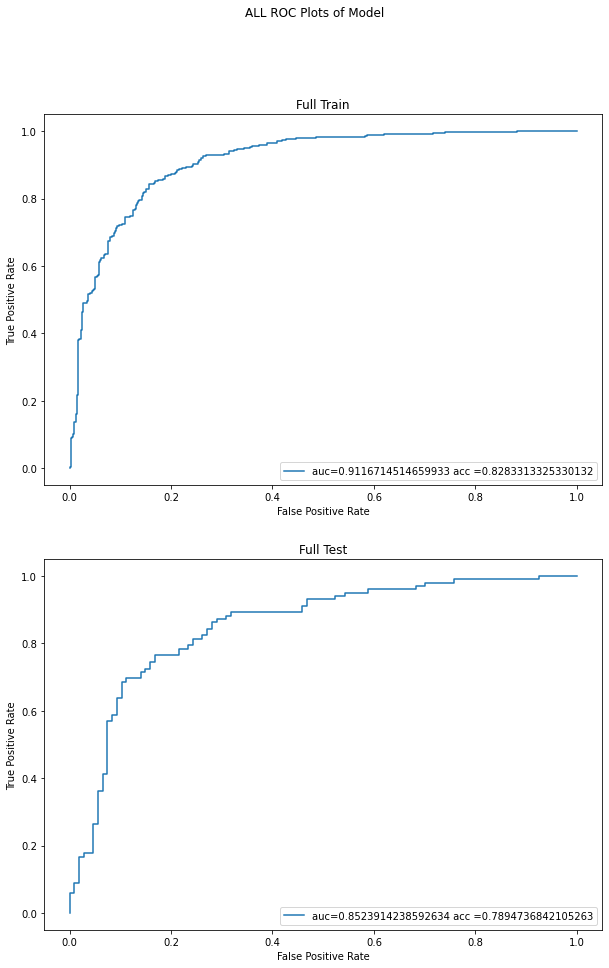

In [45]:
fig, axs = plt.subplots(2, figsize=(10, 15))
fig.suptitle('ALL ROC Plots of Model')
axs[0].plot(fpr1,tpr1,label="auc="+str(auc1)+" acc ="+str(a1))
axs[0].set_title('Full Train')

axs[1].plot(fpr2,tpr2,label="auc="+str(auc2)+" acc ="+str(a2))
axs[1].set_title('Full Test')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    ax.legend(loc=4)
plt.show()